In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sys

from covid19model.data.model_parameters import get_integrated_willem2012_interaction_matrices

In [158]:
# COPIED FROM \COVID19_spatial_private\tools\correlation_functions_MR-GM.py

def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", show_xlabel=True, show_ylabel=True, show_colorbar=True, **kwargs):

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    if show_colorbar:
        cbar = ax.figure.colorbar(im, ax=ax, fraction=0.046, pad=0.04, **cbar_kw) #fraction=0.046, pad=0.04, **cbar_kw)
        cbar.set_label(cbarlabel, fontsize=12)
        # cbar.ax.set_ylabel(cbarlabel, rotation=270, fontsize=15, labelpad=15) #, va="bottom"
        # cbar = ax.figure.colorbar(im, ax=ax, fraction=0.0001, pad=0.04, **cbar_kw, rotation=270, fontsize = 15, labelpad=15)
    
    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    if show_xlabel:
        ax.set_xticklabels(col_labels)
    else:
        ax.set_xticklabels([None]*len(col_labels))
    if show_ylabel:
        ax.set_yticklabels(row_labels)
    else:
        ax.set_yticklabels([None]*len(row_labels))

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    # Rotate the tick labels and set their alignment.
    matplotlib.pyplot.setp(ax.get_xticklabels(), rotation=-90, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    if show_colorbar:
        return im, cbar
    else:
        return im

def heatmap_discrete(data, maxlag, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)
    
    maxVal = int(data.to_numpy().max())
    minVal = int(data.to_numpy().min())

    # Create colorbar
    #cmap = matplotlib.cm.get_cmap('YlGn', (maxlag*2+1))
    cmap = matplotlib.cm.get_cmap('YlGn', maxVal-minVal+1)
    #bounds = list(range(-maxlag, (maxlag+1), 1))
    bounds = list(range(minVal, maxVal, 1))
    norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
#     cbar = ax.figure.colorbar(im, ax=ax, norm=norm, boundaries= bounds, spacing='uniform', fraction=0.046, pad=0.04, **cbar_kw) #fraction=0.046, pad=0.04, **cbar_kw)
#     cbar.set_label(cbarlabel, fontsize=12)
    
    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    matplotlib.pyplot.setp(ax.get_xticklabels(), rotation=-90, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar

In [60]:
initN, Nc_dict = get_integrated_willem2012_interaction_matrices(spatial='arr')
np.max(Nc_dict['leisure'])

4.563222318986674

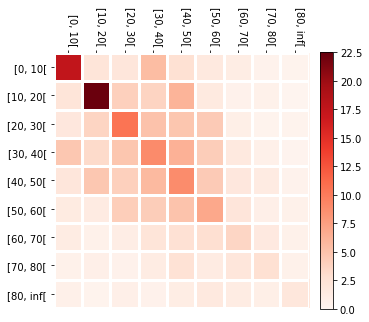

In [159]:
row_labels = np.array(['[0, 10[', '[10, 20[', '[20, 30[', '[30, 40[', '[40, 50[', '[50, 60[', '[60, 70[', '[70, 80[', '[80, inf['])
col_labels = row_labels

fig, ax = plt.subplots(figsize=(5, 5))
im, cbar = heatmap(Nc_dict['total'], row_labels, col_labels, cmap='Reds', vmin=0, vmax=22.5, ax=ax)

plt.savefig('Nc_total.png', dpi=400, bbox_inches='tight')

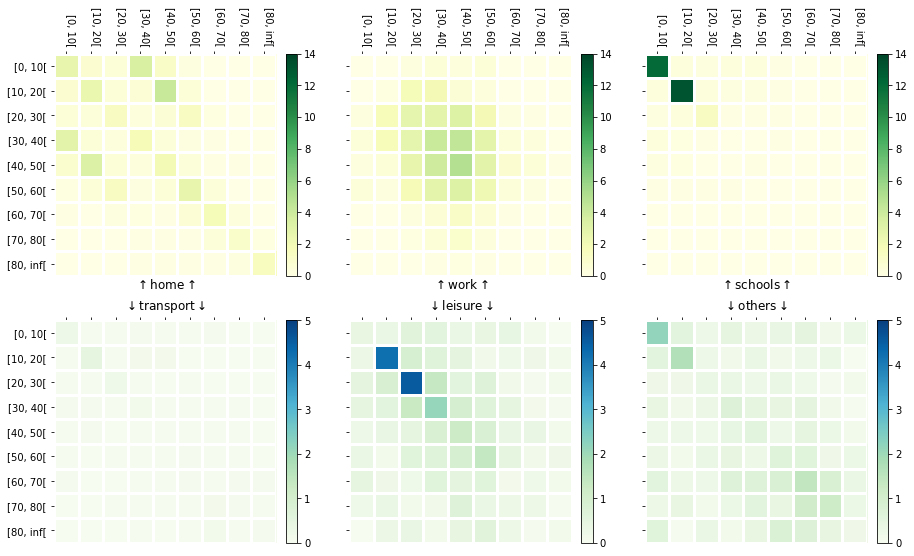

In [144]:
cmap_top = 'YlGn'
cmap_bottom = 'GnBu'
vmin = 0
vmax_top = 14
vmax_bottom = 5

fig, axs = plt.subplots(2,3, figsize=(15, 9))
im1, cbar1 = heatmap(Nc_dict['home'], row_labels, col_labels, cmap=cmap_top, vmin=vmin, vmax=vmax_top, ax=axs[0, 0], \
                     show_colorbar=True)
im2, cbar2 = heatmap(Nc_dict['work'], row_labels, col_labels, cmap=cmap_top, vmin=vmin, vmax=vmax_top, ax=axs[0, 1], \
                     show_ylabel=False, show_colorbar=True)
im3, cbar3 = heatmap(Nc_dict['schools'], row_labels, col_labels, cmap=cmap_top, vmin=vmin, vmax=vmax_top, ax=axs[0, 2], \
                     show_ylabel=False, show_colorbar=True)
im4, cbar4 = heatmap(Nc_dict['transport'], row_labels, col_labels, cmap=cmap_bottom, vmin=vmin, vmax=vmax_bottom, ax=axs[1, 0], \
                     show_xlabel=False, show_colorbar=True)
im5, cbar5 = heatmap(Nc_dict['leisure'], row_labels, col_labels, cmap=cmap_bottom, vmin=vmin, vmax=vmax_bottom, ax=axs[1, 1], \
                     show_ylabel=False, show_xlabel=False, show_colorbar=True)
im6, cbar6 = heatmap(Nc_dict['others'], row_labels, col_labels, cmap=cmap_bottom, vmin=vmin, vmax=vmax_bottom, ax=axs[1, 2],\
                     show_ylabel=False, show_xlabel=False, show_colorbar=True)

axs[0, 0].set_title(r'$\uparrow$home$\uparrow$', fontsize=12, y=-0.085)
axs[0, 1].set_title(r'$\uparrow$work$\uparrow$', fontsize=12, y=-0.085)
axs[0, 2].set_title(r'$\uparrow$schools$\uparrow$', fontsize=12, y=-0.085)

axs[1, 0].set_title(r'$\downarrow$transport$\downarrow$',fontsize=12, y=1.02)
axs[1, 1].set_title(r'$\downarrow$leisure$\downarrow$',fontsize=12, y=1.02)
axs[1, 2].set_title(r'$\downarrow$others$\downarrow$',fontsize=12, y=1.02)

plt.savefig('test_jwz.png', dpi=400)